# Task 1  

## General instructions

First, update the following text to have a link to your Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/annieradams/eds-220-hwk3

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now. Points will be deducted for insufficient comments.


## About the data
In this task you will use two datsets:

**First dataset**

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
The data portal has plenty of information. 
You will find extra information and metadata for this datset in the 'NYSDEC_SpillIncidents_Overview.pdf' and 'NYSDEC_SpillIncidents_DataDictionary.pdf' documents available at the portal.

You can access this datset via its URL or download it as a csv. 
If you chose to access it via URL, it will take a while to load every time you import it. 

**Second dataset**

The second dataset is a [TIGER shapefile from the United States Census Bureau](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341). 
For this task you will need to **download the 2022 counties (and equivalent) TIGER shapefile**. 
You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 



## File management
Make sure all your data files are inside a directory named 'data' inside your repository's directory (working directory).

## Datasets description
Read the metadata for both datsets and write a brief description about each once. Indicate the date sources and date of access.

**Spilling Incidents : This dataset contains records of spills of petroleum and other hazardous materials, as spills that can pollute lands are required to be reported by the spiller. Examples of what may be included in a spill record includes: Administrative information (DEC region and unique seven-digit spill number), program facility name, spill date/time, location, spill source and cause, material(s) and material type spilled, quantity spilled and recovered ,and units measured. The data is provided by the New York State Department of Environmental Conservation. It was accessed on November 7th, 2023**

**TIGER shapefile : TIGER Shapefiles From the US census bureau  depicting US county boundaries. Access on November 7th, 2023**


## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now. 

Text(0.25, 0.03, 'One spill occured in Tuscarora Indian Reservation within Niagara County')

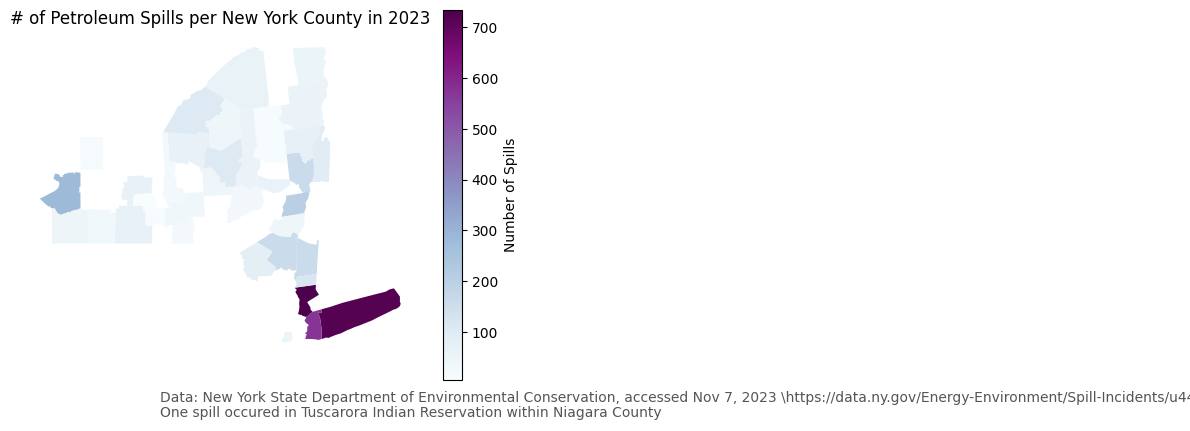

In [1]:
### ===== FINAL CODE =====
import numpy as np # import relevatn libraries
import geopandas as gpd 
import pandas as pd
from matplotlib import pyplot as plt


#load in data
spills = pd.read_csv("data/Spill_Incidents.csv") # load in spills data
counties =gpd.read_file("data/tl_2022_us_county/tl_2022_us_county.shp") # load in shapefile 

#update column names
new_col_names = {'Spill Number': 'spill_number',  # rename column names 
                 'Street 1': 'street_1',
                 'Street 2': 'street_2',
                 'ZIP Code': 'zip_code',
                 'DEC Region': 'dec_region',
                 'Spill Date': 'spill_date',
                 'Received Date': 'received_data',
                 'Contributing Factor': 'contributing_factor',
                 'Close Data':'close_data',
                 'Material Name': 'material_name',
                 'Material Family': 'material_family',
                 'County': 'county'
    
}

spills = spills.rename(columns = new_col_names) # assign neew column names to spills data 



#change to datetime and select dates from 1/1/23 to 10/31/23
spills.spill_date = pd.to_datetime(spills.spill_date) # make spills data column datetime
petr_23 = spills[(spills.spill_date >= "2023-01-01") & (spills.spill_date <= "2023-10-31")& (spills.material_family == "Petroleum")] # select dates between Jan 1 2023 and Pct 31 2023


#aggregate data
spills_per_county = petr_23.groupby('county').count() # group by county and then take count for each county
spills_per_county = spills_per_county.reset_index() # reset the index so county is a column name that can be called on
spills_per_county = spills_per_county[['county','spill_number']] # select only county and spill number and reassign to spills_per_county 
new_col_names = {'spill_number': 'n_spills'} # change spill column name from spill number to n_spills
spills_per_county = spills_per_county.rename(columns = new_col_names) # update new collumn name and reassign to spills per county dataframe 


#update counties data column names 
counties.columns = counties.columns.str.lower() # make all column names lowercase

new_col_names = {'statefp': 'state_fp', # update some column names to make more clear
                 'countyfp': 'county_fp',
                 'countyns':'county_ns',
                 'geoid':'geo_id',
                'name': 'county'    
}
counties = counties.rename(columns = new_col_names) # reassign new column names to counties geodataframe 


#select new york counties
ny_counties = counties[(counties['state_fp'] == '36')] #select counties where fip code is 36-  fips code for New York


#update St lawrence to have same spelling in both dataframes
st_lawrence_index = spills_per_county[spills_per_county.county=='St Lawrence'].index[0] #find index number for St Lawrence 
spills_per_county.at[st_lawrence_index, 'county']= 'St. Lawrence' # find index of st.lawrence using var created above and change name of St Lawrence to St. Lawrence


#merge data
ny_counties = pd.merge(ny_counties,spills_per_county, how = 'inner', on = 'county') # inner join ny counties and spills on column county



# add a spill to niagara county to account for Tuscarora Indian Reservation
Niagara_county_index = ny_counties[ny_counties.county=='Niagara'].index[0] # find index for Niagara county
ny_counties.at[Niagara_county_index, 'n_spills']=  ny_counties.at[Niagara_county_index, 'n_spills'] + 1 # add 1 spill to niagara county to account for tuscarora indian reservation



#create chloropleth map
ny_counties.plot(column = 'n_spills', # plot n_spills column
                     legend = True, # show legen
                     legend_kwds={'label': "Number of Spills",  # Add a legend title 
                      'orientation': "vertical"}, # make legend title verticle
                     cmap= 'BuPu') # update color to blue purple
plt.title("# of Petroleum Spills per New York County in 2023") # give the plot a title
plt.axis('off') # get rid of plot axis

plt.annotate("Data: New York State Department of Environmental Conservation, accessed Nov 7, 2023 \https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk",  # add data source
            xy=(0.25, .06), # position
            xycoords='figure fraction', 
            fontsize=10, 
            color='#555555')
plt.annotate("One spill occured in Tuscarora Indian Reservation within Niagara County", # add a note about accounting for Tuscarora Indian Reservation
            xy=(0.25, .03), # position
            xycoords='figure fraction', 
            fontsize=10, 
            color='#555555')


<!-- write your description in this markdwon cell -->

## Import libraries

In [2]:
# import libraries here
# import numpy too

import numpy as np
import geopandas as gpd 
import pandas as pd
from matplotlib import pyplot as plt

## Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties shapefile as a variable named `counties`.


In [3]:
spills = pd.read_csv("data/Spill_Incidents.csv")
counties =gpd.read_file("data/tl_2022_us_county/tl_2022_us_county.shp")


## Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### Exploration

In the next cells:

1. Check the dataframe's head
2. Simplify column names as needed
3. Check the data types of the columns
4. Check the unique values in the `material_family` column
5. Check the unique values in the `county` column

You can add any other cells of preliminary data exploration.

In [4]:
# 1. check the dataframes head 
spills.head()

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0


In [5]:
# 2. Simplify column names as needed
#dictionary of new column names


new_col_names = {'Spill Number': 'spill_number',
                 'Street 1': 'street_1',
                 'Street 2': 'street_2',
                 'ZIP Code': 'zip_code',
                 'DEC Region': 'dec_region',
                 'Spill Date': 'spill_date',
                 'Received Date': 'received_data',
                 'Contributing Factor': 'contributing_factor',
                 'Close Data':'close_data',
                 'Material Name': 'material_name',
                 'Material Family': 'material_family',
                 'County': 'county'
    
}

spills = spills.rename(columns = new_col_names)
spills.columns

Index(['spill_number', 'Program Facility Name', 'street_1', 'street_2',
       'Locality', 'county', 'zip_code', 'SWIS Code', 'dec_region',
       'spill_date', 'received_data', 'contributing_factor', 'Waterbody',
       'Source', 'Close Date', 'material_name', 'material_family', 'Quantity',
       'Units', 'Recovered'],
      dtype='object')

In [6]:
# 3. check the datatypes of the columns using dtypes
spills.dtypes

spill_number               int64
Program Facility Name     object
street_1                  object
street_2                  object
Locality                  object
county                    object
zip_code                  object
SWIS Code                  int64
dec_region                 int64
spill_date                object
received_data             object
contributing_factor       object
Waterbody                 object
Source                    object
Close Date                object
material_name             object
material_family           object
Quantity                 float64
Units                     object
Recovered                float64
dtype: object

In [7]:
# 4. check the uniqie values in the material family column
np.unique(spills.material_family)

array(['Hazardous Material', 'Other', 'Oxygenates', 'Petroleum'],
      dtype=object)

In [8]:
# 5.check the unique values in the country column 
np.unique(spills.county)

array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Canada - Region 5',
       'Canada - Region 6', 'Canada - Region 8', 'Canada - Region 9',
       'Cattaraugus', 'Cattaraugus Indian Reservation', 'Cayuga',
       'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
       'Connecticut - Region 1', 'Connecticut - Region 3 (N)',
       'Connecticut - Region 3 (T)', 'Connecticut - Region 4', 'Cortland',
       'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin', 'Fulton',
       'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson', 'Kings',
       'Lewis', 'Livingston', 'Madison', 'Massachusetts - Region 4',
       'Monroe', 'Montgomery', 'Nassau', 'New Jersey - Region 2',
       'New Jersey - Region 3 (N)', 'New Jersey - Region 3 (T)',
       'New York', 'Niagara', 'Oil Springs Indian Reservation', 'Oneida',
       'Onondaga', 'Onondaga Indian Reservation', 'Ontario', 'Orange',
       'Orleans', 'Oswego', 'Otsego', 'Pennsylvania - Region 3',
       'Pennsylvania - Region 7', 'P

In [9]:
spills.spill_date = pd.to_datetime(spills.spill_date) # make 

### Data selection

1. Select data about petroleum spills that took place between January 1st 2023, and October 31st (including both dates), 2023. Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells if you needed.

In [10]:
# your code here

petr_23 = spills[(spills.spill_date >= "2023-01-01") & (spills.spill_date <= "2023-10-31")& (spills.material_family == "Petroleum")]

petr_23.head()

,spill_number,Program Facility Name,street_1,street_2,Locality,county,zip_code,SWIS Code,dec_region,spill_date,received_data,contributing_factor,Waterbody,Source,Close Date,material_name,material_family,Quantity,Units,Recovered
220,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,#2 fuel oil,Petroleum,0.0,Gallons,0.0
221,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,"used oil (heating, on-site consumption)",Petroleum,0.0,NaN,0.0
222,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,#2 fuel oil (on-site consumption),Petroleum,0.0,NaN,0.0
223,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,Diesel (E-Gen),Petroleum,0.0,NaN,0.0
225,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,waste oil/used oil,Petroleum,0.0,NaN,0.0


2. Verify that `petr_23` only has data for petroleum spills 

In [11]:
# your code here

np.unique(petr_23.material_family) # confirm unique values of material family is petroleum

array(['Petroleum'], dtype=object)

3. Verify that `petr_23` only has data for 2023. 
HINT: if you converted the `spill_date` column to datetime, you can use `petr_23.spill_date.dt.year.unique()`

In [12]:
# your code here
petr_23.spill_date.dt.year.unique() # check to see unique years

array([2023])

4. Verify that `petr_23` only has data from January to October. 

In [13]:
# your code here

petr_23.spill_date.dt.month.unique() # check to see that months are between 1 and 10

array([ 6,  8,  9,  7,  1,  2,  3, 10,  5,  4])

### Data aggregation

Create new dataframe named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Column one: county names, column name = `county`
- Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if you needed.

In [14]:
# your code here
spills_per_county = petr_23.groupby('county').count() #group by county and count per county
spills_per_county = spills_per_county.reset_index() # reset index so we can call county as a var
spills_per_county = spills_per_county[['county','spill_number']] # select county and spill number
new_col_names = {'spill_number': 'n_spills'} # rename column names to n_spills
spills_per_county = spills_per_county.rename(columns = new_col_names) # reassign spills per county to have new column names

spills_per_county.head()





,county,n_spills
0,Albany,204
1,Allegany,30
2,Bronx,143
3,Broome,74
4,Cattaraugus,46


## Prepare counties data

This section refers to the `counties` geodataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### Exploration

In the next cells:

1. Check the geo-dataframe's head
2. Simplify column names as needed
3. Check the data types of the columns
4. Check the geo-dataframe's CRS
5. Plot the geo-dataframe.

You can add any other cells of preliminary data exploration.

In [15]:
# 1.check head of geo dataframe
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,NaN,NaN,NaN,A,1477644346,10691216,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,NaN,NaN,NaN,A,680980770,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,NaN,NaN,NaN,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,NaN,NaN,NaN,A,2169272978,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,NaN,NaN,NaN,A,1489645185,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [16]:
# 2. simplify column names
counties.columns = counties.columns.str.lower() # make all column names lower case

new_col_names = {'statefp': 'state_fp', # update column names to make more sense
                 'countyfp': 'county_fp',
                 'countyns':'county_ns',
                 'geoid':'geo_id',
                'name': 'county'    
}
counties = counties.rename(columns = new_col_names) # reassign counties df to have update column names


In [17]:
# 3. 
counties.dtypes #check data types of columns

state_fp       object
county_fp      object
county_ns      object
geo_id         object
county         object
namelsad       object
lsad           object
classfp        object
mtfcc          object
csafp         float64
cbsafp        float64
metdivfp      float64
funcstat       object
aland           int64
awater          int64
intptlat       object
intptlon       object
geometry     geometry
dtype: object

In [18]:
# 4. check the geo dataframes crs
print("The CRS of the counties geo dataframe is:", counties.crs)


The CRS of the counties geo dataframe is: epsg:4269


/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

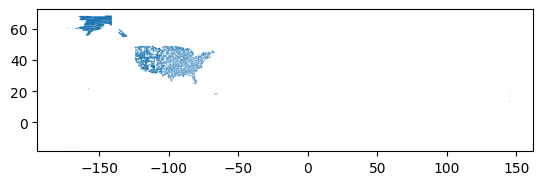

In [19]:
# 5. 
counties.plot() # plot counties data

### Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them. HINT: to find which counties correspond to NY, look at the metadata.

<AxesSubplot:>

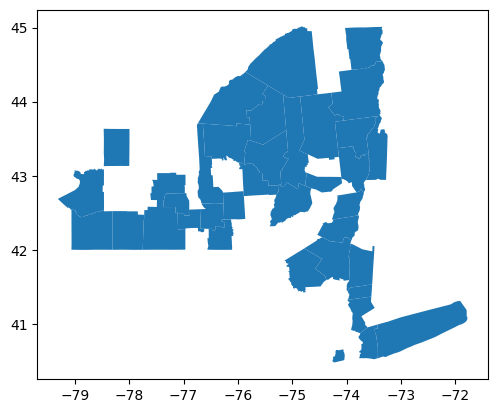

In [20]:
# your code here
ny_counties = counties[(counties['state_fp'] == '36')]# select ny counties by selecting fips code of 36 for NY
ny_counties.plot() # I have the correct data but cannot load it properly due to Taylor not being able to handle the data size 

## Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### Explore data

In the next cells:

1. Print the names of counties in `ny_counties`, without repetition.
2. Print the names of counties in `spills_per_county`, without repetition. (Do you notice anything?)
3. Use the [`numpy` function `setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html) to find the county names that are in `spills_per_county`, but not in `ny_counties`. HINT: pay attention to the example in the documentation.
4. Find the county names that are in `ny_counties`, but not in `spills_per_county`.
5. Check the number of spills in 'Tuscarora Indian Reservation'.


In [21]:
# 1.
print(np.unique(ny_counties.county)) # print names of counties in ny_counties without repetetion by using unique

['Albany' 'Allegany' 'Bronx' 'Broome' 'Cattaraugus' 'Cayuga' 'Chautauqua'
 'Chemung' 'Chenango' 'Clinton' 'Columbia' 'Cortland' 'Delaware'
 'Dutchess' 'Erie' 'Essex' 'Franklin' 'Fulton' 'Genesee' 'Greene'
 'Hamilton' 'Herkimer' 'Jefferson' 'Kings' 'Lewis' 'Livingston' 'Madison'
 'Monroe' 'Montgomery' 'Nassau' 'New York' 'Niagara' 'Oneida' 'Onondaga'
 'Ontario' 'Orange' 'Orleans' 'Oswego' 'Otsego' 'Putnam' 'Queens'
 'Rensselaer' 'Richmond' 'Rockland' 'Saratoga' 'Schenectady' 'Schoharie'
 'Schuyler' 'Seneca' 'St. Lawrence' 'Steuben' 'Suffolk' 'Sullivan' 'Tioga'
 'Tompkins' 'Ulster' 'Warren' 'Washington' 'Wayne' 'Westchester' 'Wyoming'
 'Yates']


In [22]:
# 2.
print(np.unique(spills_per_county.county))# print names of spills per county counties and notice that it also includes New Jersey - region 2 adn Tuscaroa Indian Reservation

['Albany' 'Allegany' 'Bronx' 'Broome' 'Cattaraugus' 'Cayuga' 'Chautauqua'
 'Chemung' 'Chenango' 'Clinton' 'Columbia' 'Cortland' 'Delaware'
 'Dutchess' 'Erie' 'Essex' 'Franklin' 'Fulton' 'Genesee' 'Greene'
 'Hamilton' 'Herkimer' 'Jefferson' 'Kings' 'Lewis' 'Livingston' 'Madison'
 'Monroe' 'Montgomery' 'Nassau' 'New Jersey - Region 2' 'New York'
 'Niagara' 'Oneida' 'Onondaga' 'Ontario' 'Orange' 'Orleans' 'Oswego'
 'Otsego' 'Putnam' 'Queens' 'Rensselaer' 'Richmond' 'Rockland' 'Saratoga'
 'Schenectady' 'Schoharie' 'Schuyler' 'Seneca' 'St Lawrence' 'Steuben'
 'Suffolk' 'Sullivan' 'Tioga' 'Tompkins' 'Tuscarora Indian Reservation'
 'Ulster' 'Warren' 'Washington' 'Wayne' 'Westchester' 'Wyoming' 'Yates']


In [23]:
# 3. 
np.setdiff1d(np.unique(spills_per_county.county), np.unique(ny_counties.county)) # use setdiff1d to find differences in county names that are in spills per county but are not in ny_counties

array(['New Jersey - Region 2', 'St Lawrence',
       'Tuscarora Indian Reservation'], dtype=object)

In [24]:
# 4.
np.setdiff1d(np.unique(ny_counties.county),np.unique(spills_per_county.county)) # use setdiff1d to find differences in county names that are in ny_counties but are not in spills per vounty

array(['St. Lawrence'], dtype=object)

In [25]:
# 5. 
spills_per_county[(spills_per_county.county == "Tuscarora Indian Reservation")] # check to see that there was 1 spill at the Tuscarora Indian reservation

,county,n_spills
56,Tuscarora Indian Reservation,1


### Data updates

In this section we will update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame.

In the next cells:
1. Check the row in `spills_per_county` that has 'St Lawrence'
2. Run the code and read the explanation in the comments
3. Run the code and read the explanation in the comments
4. Use the `st_lawrence_index` and `at` to update St Lawrence name in `spills_per_county` dataframe
5. Check the update was successfull

In [26]:
# 1. 
spills_per_county[(spills_per_county.county == "St Lawrence")] # check row that has St Lawrence

,county,n_spills
50,St Lawrence,65


In [27]:
# 2. we can get the index of that single row like this, to access the actual row index...
spills_per_county[spills_per_county.county=='St Lawrence'].index

Int64Index([50], dtype='int64')

In [28]:
# 3. we need to select the first item in that tuple using [0]
st_lawrence_index = spills_per_county[spills_per_county.county=='St Lawrence'].index[0]
st_lawrence_index

50

In [29]:
# 4. 
spills_per_county.at[st_lawrence_index, 'county']= 'St. Lawrence' # find index of 50 and change name of St Lawrence to St. Lawrence

In [30]:
# 5.
spills_per_county[(spills_per_county.county == "St. Lawrence")] # check to make sure county name was changed

,county,n_spills
50,St. Lawrence,65


### Merge

In the following cells:
1. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 
2. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.

From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

3. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. We will add a note about this in our final map. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [31]:
# 1. 
print(ny_counties.columns) # check to make sure there is a common column name to merge on
print(spills_per_county.columns) 





Index(['state_fp', 'county_fp', 'county_ns', 'geo_id', 'county', 'namelsad',
       'lsad', 'classfp', 'mtfcc', 'csafp', 'cbsafp', 'metdivfp', 'funcstat',
       'aland', 'awater', 'intptlat', 'intptlon', 'geometry'],
      dtype='object')
Index(['county', 'n_spills'], dtype='object')


In [32]:
# 2.
ny_counties = pd.merge(ny_counties,spills_per_county, how = 'inner', on = 'county') # inner join ny counties and spills on column county
ny_counties


,state_fp,county_fp,county_ns,geo_id,county,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry,n_spills
0,36,101,00974148,36101,Steuben,Steuben County,06,H1,G4020,NaN,NaN,NaN,A,3601398422,35039875,+42.2667252,-077.3855253,"POLYGON ((-77.08327 42.00002, -77.09391 41.999...",71
1,36,091,00974143,36091,Saratoga,Saratoga County,06,H1,G4020,NaN,NaN,NaN,A,2097812305,87488004,+43.1061353,-073.8553872,"POLYGON ((-73.67891 42.91221, -73.67938 42.911...",159
2,36,003,00974100,36003,Allegany,Allegany County,06,H1,G4020,NaN,NaN,NaN,A,2666225086,12989848,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518...",30
3,36,075,00974136,36075,Oswego,Oswego County,06,H1,G4020,NaN,NaN,NaN,A,2464636023,933469962,+43.4614431,-076.2092618,"POLYGON ((-76.02509 43.70702, -76.02004 43.706...",68
4,36,111,00974153,36111,Ulster,Ulster County,06,H1,G4020,NaN,NaN,NaN,A,2911757764,94596810,+41.9472124,-074.2654582,"POLYGON ((-74.07480 42.09659, -74.06441 42.120...",159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,36,051,00974124,36051,Livingston,Livingston County,06,H1,G4020,NaN,NaN,NaN,A,1636254770,22005357,+42.7290418,-077.7784630,None,59
58,36,025,00974111,36025,Delaware,Delaware County,06,H1,G4020,NaN,NaN,NaN,A,3736306657,64163829,+42.1939865,-074.9667281,None,40
59,36,071,00974134,36071,Orange,Orange County,06,H1,G4020,NaN,NaN,NaN,A,2103272841,67953621,+41.4024096,-074.3062522,None,330
60,36,093,00974144,36093,Schenectady,Schenectady County,06,H1,G4020,NaN,NaN,NaN,A,530089712,12366944,+42.8175516,-074.0435592,None,77


In [33]:
# your code here

Niagara_county_index = ny_counties[ny_counties.county=='Niagara'].index[0] # find index where county is niagara
ny_counties.at[Niagara_county_index, 'n_spills'] # check to see that niagara county has 88 spills
ny_counties.at[Niagara_county_index, 'n_spills']=  ny_counties.at[Niagara_county_index, 'n_spills'] + 1 # add 1 spill to niagara county
ny_counties[(ny_counties.county == "Niagara")] # check to see that n_spills for niagara county is now 89

,state_fp,county_fp,county_ns,geo_id,county,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry,n_spills
45,36,063,00974130,36063,Niagara,Niagara County,06,H1,G4020,NaN,NaN,NaN,A,1352887560,1598842379,+43.2726719,-078.8129431,None,89


## Map
Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an annotation with the data source (New York State Department of Environmental Conservation), date of access HINT: check the graph we did for power plants, 
- an annotation indicating one spill occurred in Tuscarora Indian Reservation within Niagara county

Tuscarora Indian Reservation in Niagara county

Text(0.25, 0.03, 'One spill occured in Tuscarora Indian Reservation within Niagara County')

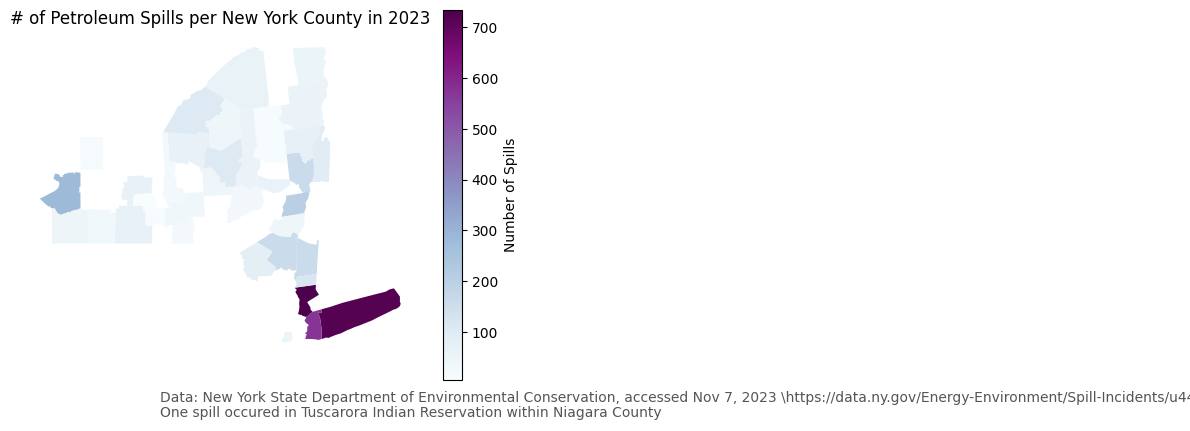

In [38]:
#create chloropleth map
ny_counties.plot(column = 'n_spills', # plot n_spills column
                     legend = True, # show legen
                     legend_kwds={'label': "Number of Spills",  # Add a legend title 
                      'orientation': "vertical"}, # make legend title verticle
                     cmap= 'BuPu') # update color to blue purple
plt.title("# of Petroleum Spills per New York County in 2023") # give the plot a title
plt.axis('off') # get rid of plot axis
plt.annotate("Data: New York State Department of Environmental Conservation, accessed Nov 7, 2023 \https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk",  # add data source
            xy=(0.25, .06), # position
            xycoords='figure fraction', 
            fontsize=10, 
            color='#555555')
plt.annotate("One spill occured in Tuscarora Indian Reservation within Niagara County", # add a note about accounting for Tuscarora Indian Reservation
            xy=(0.25, .03), # position
            xycoords='figure fraction', 
            fontsize=10, 
            color='#555555')

## Final code

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. For each line, add a single comment explaining what the code does.